In [69]:
import pandas as pd 
import numpy as np
import ast
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
#read data
movieData = pd.read_csv('tmdb_5000_movies.csv')
movieData.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [71]:
movieData.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [72]:
def resolve_data(data):
    tmp = list(data)

    tmp = list(map(lambda item: ast.literal_eval(item) , tmp))
    return tmp

def get_names(data):
    resolvedData = resolve_data(data)
    return list(map(lambda x: ', '.join(list(map(lambda y: y['name'], x))), resolvedData))

In [73]:
for key in ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']:
    movieData[key] = get_names(movieData[key])

movieData.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [74]:
movieData['profit'] = movieData['revenue'] - movieData['budget']

In [75]:
dt = movieData[['genres','title','original_language','release_date','vote_average','runtime','profit']]
dt.head()

,genres,title,original_language,release_date,vote_average,runtime,profit
0,"Action, Adventure, Fantasy, Science Fiction",Avatar,en,2009-12-10,7.2,162.0,2550965087
1,"Adventure, Fantasy, Action",Pirates of the Caribbean: At World's End,en,2007-05-19,6.9,169.0,661000000
2,"Action, Adventure, Crime",Spectre,en,2015-10-26,6.3,148.0,635674609
3,"Action, Crime, Drama, Thriller",The Dark Knight Rises,en,2012-07-16,7.6,165.0,834939099
4,"Action, Adventure, Science Fiction",John Carter,en,2012-03-07,6.1,132.0,24139100


In [76]:
dt.shape

(4803, 7)

In [77]:
s = dt['genres'].str.split(', ').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del dt['genres']
df = dt.join(s)


df.head()

,title,original_language,release_date,vote_average,runtime,profit,genres
0,Avatar,en,2009-12-10,7.2,162.0,2550965087,Action
0,Avatar,en,2009-12-10,7.2,162.0,2550965087,Adventure
0,Avatar,en,2009-12-10,7.2,162.0,2550965087,Fantasy
0,Avatar,en,2009-12-10,7.2,162.0,2550965087,Science Fiction
1,Pirates of the Caribbean: At World's End,en,2007-05-19,6.9,169.0,661000000,Adventure


In [78]:
df.shape

(12188, 7)

In [79]:
df['genres'].unique()

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', 'TV Movie', ''], dtype=object)

In [80]:
len(df['genres'].unique())

21

In [81]:
# let's figure out what genres is most popular
df1 = df[df['vote_average']>=8]
df1.shape

(197, 7)

In [82]:
groupByGenres = (pd.DataFrame(df1.groupby('genres').title.nunique())).sort_values('title', ascending=False )
groupByGenres

,title
genres,
Drama,54
Crime,17
Comedy,16
Thriller,15
Adventure,13
Action,12
Fantasy,9
Documentary,8
Family,8


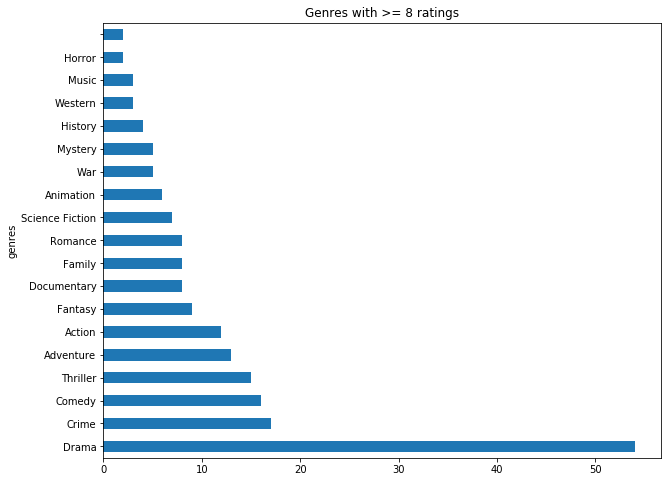

In [83]:
# Visualize that

groupByGenres['title'].plot.barh(stacked=True, title = 'Genres with >= 8 ratings', figsize=(10, 8));

In [84]:
df2 = df[['title', 'profit','genres']]
df2.head()

,title,profit,genres
0,Avatar,2550965087,Action
0,Avatar,2550965087,Adventure
0,Avatar,2550965087,Fantasy
0,Avatar,2550965087,Science Fiction
1,Pirates of the Caribbean: At World's End,661000000,Adventure


In [97]:
avg = df2.groupby(['genres']).mean()
avg['profit_million'] = avg['profit']/1000000
del avg['profit']

In [98]:
avg.sort_values('profit_million', ascending=False, inplace = True )

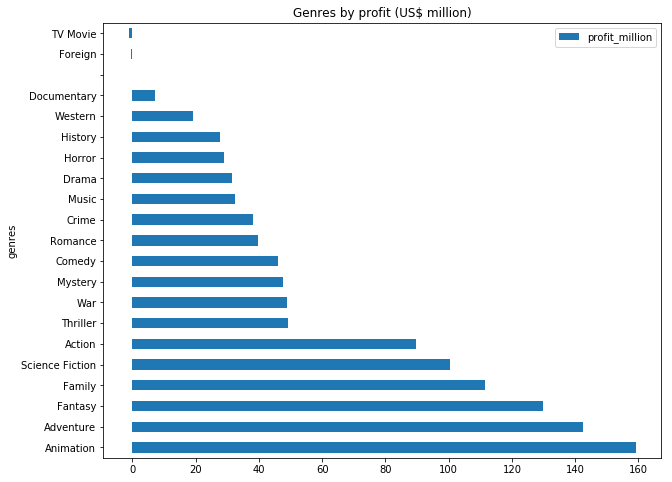

In [99]:
avg[['profit_million']].plot.barh(stacked=True, title = 'Genres by profit (US$ million)', figsize=(10, 8));

In [102]:
groupedbyDuration = df[['title', 'runtime','genres']]
groupedbyDuration.head()

,title,runtime,genres
0,Avatar,162.0,Action
0,Avatar,162.0,Adventure
0,Avatar,162.0,Fantasy
0,Avatar,162.0,Science Fiction
1,Pirates of the Caribbean: At World's End,169.0,Adventure


In [104]:
groupedbyDurationAndGenre = groupedbyDuration.groupby(['genres']).mean()
groupedbyDurationAndGenre['average_duration']  = groupedbyDurationAndGenre['runtime'].round(2)
del groupedbyDurationAndGenre['runtime']
groupedbyDurationAndGenre.sort_values('average_duration', ascending=False, inplace = True )

groupedbyDurationAndGenre

,average_duration
genres,
History,135.99
War,131.83
Western,117.35
Drama,113.31
Adventure,111.33
Foreign,110.62
Action,110.54
Music,109.92
Crime,109.67


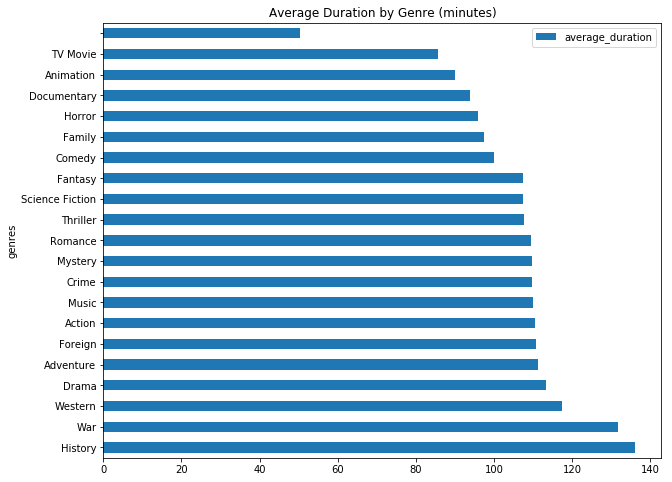

In [105]:
groupedbyDurationAndGenre[['average_duration']].plot.barh(stacked=True, title = 'Average Duration by Genre (minutes)', figsize=(10, 8));